<a href="https://colab.research.google.com/github/RodolfoFerro/uanl-workshop/blob/master/DL_101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción a las Deep Learning con Rodo

## Contenidos

### Sección I

1. Brief histórico
2. Un perceptrón
3. Activación y bias

### Sección II

4. Aprendizaje de neuronas
5. Entrenamiento de una neurona
6. Predicciones

### Sección III

7. El dataset a utilizar
8. Preparación de los datos
9. Creación de una red neuronal
10. Entrenamiento del modelo
11. Evaluación y predicción

### ¡Reto!

## **Sección I**

### **Historia de las redes neuronales**

La historia de las redes neuronales se remontan a un tipo de neurona artificial, llamada **perceptrón**. Estos fueron desarrollados entre 1950 y 1960 por el científico **Frank Rosenblatt**.



### **Entonces, ¿qué es un perceptrón?**

Un perceptrón es una abstracción de una neurona real.

Éste toma varias **entradas** $x_1, x_2,..., x_n $ y produce una **salida**. Para la salida, Rosenblatt propuso que las entradas tuviesen **pesos** asciados $w_1, w_2, ..., w_n$, siendo estos números reales que expresan la importancia respectiva de cada entrada para la salida. La salida de la neurona, $0$ o $1$, está determinada con base en que la suma ponderada, 

$$\displaystyle\sum_{j}w_jx_j,$$

<!-- $\textbf{w}_{Layer}\cdot\textbf{x} = 
\begin{bmatrix}
w_{1, 1} & w_{1, 2} & \cdots & w_{1, n}\\
w_{2, 1} & w_{2, 2} & \cdots & w_{2, n}\\
\vdots & \vdots & \ddots & \vdots\\
w_{m, 1} & w_{m, 2} & \cdots & w_{m, n}\\
\end{bmatrix} \cdot
\begin{bmatrix}
x_1\\
x_2\\
\vdots\\
x_n
\end{bmatrix}$ -->

(para $j \in \{1, 2, ..., n\}$ ) sea menor o mayor que un **valor límite** que por ahora llamaremos umbral.

Resumiendo, un perceptron es un sistema que toma decisiones con base en la evidencia presentada.

#### **Implementemos un perceptrón**

In [ ]:
import numpy as np


# Primero creamos nuestra clase perceptron
class Perceptron():
    def __init__(self, inputs, weights):
        """Class constructor.
        
        Parameters
        ----------
        inputs : list
            List of input values.
        weights : list
            List of weight values.
        """

        self.inputs = None # TODO: np.array <- inputs
        self.weights = None # TODO: np.array <- weights
  
    def decide(self, treshold):
        """Function that operates inputs @ weights.
        
        Parameters
        ----------
        treshold : int
            Threshold value for decision.
        """

        # TODO: Inner product of data
        pass

In [ ]:
# Now, we need to set inputs and weights
inputs, weights = [], []

questions = [
    "· ¿Cuál es la velocidad? ",
    "· ¿Ritmo cardiaco? ",
    "· ¿Respiración? "
]

for question in questions:
    i = int(input(question))
    w = int(input("· Y su peso asociado es... "))
    inputs.append(i)
    weights.append(w)
    print()

treshold = int(input("· Y nuestro umbral/límite será: "))

In [ ]:
p = Perceptron() # TODO Instantiate Perceptron
p.decide(treshold) # TODO Apply decision function with threshold

### **Bias y funciones de activación**

_Antes de seguir, introduciremos otro concepto, que es el **bias**._

La operación matemática que realiza la neurona se puede escribir como:

$$ f(\textbf{x}) = 
  \begin{cases}
    0 & \text{si $\displaystyle\sum_{j}w_jx_j <$ valor límite o treshold} \\
    1 & \text{si $\displaystyle\sum_{j}w_jx_j \geq$ valor límite o treshold} \\
  \end{cases},$$

donde $\textbf{x} = (x_1, x_2, ..., x_n)$ y $j \in \{1, 2, ..., n\}$.

De lo anterior, podemos despejar el valor límite (el umbral) y escribirlo como $b$, obteniendo:

$$ f(\textbf{x}) = 
  \begin{cases}
    0 & \text{si $\displaystyle\sum_{j}w_jx_j + b < 0$} \\
    1 & \text{si $\displaystyle\sum_{j}w_jx_j + b > 0$} \\
  \end{cases},$$

donde $\textbf{x} = (x_1, x_2, ..., x_n)$ y $j \in \{1, 2, ..., n\}$.

Esto que escribimos como $b$, también se le conoce como **bias**, y describe *qué tan susceptible la red es a __dispararse__*.

Curiosamente, esta descripción matemática encaja con la función de salto, que es una función de activación. Esto es, una función que permite el paso de información de acuerdo a la entrada y los pesos, permitiendo el disparo del lo procesado hacia la salida. La función de salto se ve como sigue:

<center>
    <img src="https://upload.wikimedia.org/wikipedia/commons/4/4a/Funci%C3%B3n_Cu_H.svg" width="40%" alt="Función escalón de Heaviside">
</center>

Sin embargo, podemos hacer a una neurona aún más susceptible con respecto a los datos de la misma (entradas, pesos, bias) añadiendo una función sigmoide. La función sigmoide se ve como a continuación: 

<center>
    <img src="https://upload.wikimedia.org/wikipedia/commons/6/66/Funci%C3%B3n_sigmoide_01.svg" width="40%" alt="Función sigmoide">
</center>

Esta función es suave, y por lo tanto tiene una diferente "sensibililad" a los cambios abruptos de valores. También, sus entradas en lugar de solo ser $1$'s o $0$'s, pueden ser valores en todos los números reales. La función sigmoide es descrita por la siguiente expresión matemática:

$$f(z) = \dfrac{1}{1+e^{-z}}$$

O escrito en términos de pesos y biases:

$$f(z) = \dfrac{1}{1+\exp{\left\{-\left(\displaystyle\sum_{j}w_jx_j +b\right)\right\}}}$$

#### **Volviendo al ejemplo**

In [ ]:
# Modificamos para añadir la función de activación
class Neuron():
    def __init__(self, inputs, weights):
        """Class constructor.
        
        Parameters
        ----------
        inputs : list
            List of input values.
        weights : list
            List of weight values.
        """

        self.inputs = None # TODO: np.array <- inputs
        self.weights = None # TODO: np.array <- weights
  
    def decide(self, bias):
        """Function that operates inputs @ weights.
        
        Parameters
        ----------
        bias : int
            The bias value for operation.
        """

        # TODO: Inner product of data + bias
        # TODO: Apply sigmoid function f(z) = 1 / (1 + e^(-z))
        pass

In [ ]:
bias = int(input("· El nuevo bias será: "))
s = Neuron(inputs, weights)
s.decide(bias)

> Esta es la neurona que usaremos para los siguientes tópicos.

<center>
    *********
</center>

## **Sección II**

### Aprendizaje de neuronas

Veamos cómo se puede entrenar una sola neurona para hacer una predicción.

Para este problema construiremos un perceptrón simple, como el propuesto por McCulloch & Pitts, usando la función sigmoide.

#### **Planteamiento del problema:**

Queremos mostrarle a una neurona simple un conjunto de ejemplos para que pueda aprender cómo se comporta una función. El conjunto de ejemplos es el siguiente:

- `(1, 0)` debería devolver `1`.
- `(0, 1)` debe devolver `1`.
- `(0, 0)` debería devolver `0`.

Entonces, si ingresamos a la neurona el valor de `(1, 1)`, debería poder predecir el número `1`.

> ¿Puedes adivinar la función?

#### ¿Que necesitamos hacer?

Programar y entrenar una neurona para hacer predicciones.

En concreto, vamos a hacer lo siguiente:

- Construir la clase y su constructor.
- Definir la función sigmoide y su derivada
- Definir el número de épocas para el entrenamiento.
- Resolver el problema y predecir el valor de la entrada deseada

In [ ]:
import numpy as np


class smart_neuron():
    def __init__(self, n):
        """Class constructor.
        
        Parameters
        ----------
        n : int
            Input size.
        """
        
        np.random.seed(123)
        self.synaptic_weights = None # TODO. Use np.random.random((n, 1)) to gen values in (-1, 1)

    def __sigmoid(self, x):
        """Sigmoid function.
        
        Parameters
        ----------
        x : float
            Input value to sigmoid function.
        """
        
        # TODO: Return result of sigmoid function f(z) = 1 / (1 + e^(-z))
        return None

    def __sigmoid_derivative(self, x):
        """Derivative of the Sigmoid function.
        
        Parameters
        ----------
        x : float
            Input value to evaluated sigmoid function."""

        # TODO: Return the derivate of sigmoid function x * (1 - x)
        return None

    def train(self, training_inputs, training_output, iterations):
        """Training function.
        
        Parameters
        ----------
        training_inputs : list
            List of features for training.
        training_outputs : list
            List of labels for training.
        iterations : int
            Number of iterations for training.
        """
        
        for iteration in range(iterations):
            output = self.predict(training_inputs)
            error = training_output.reshape((len(training_inputs), 1)) - output
            adjustment = np.dot(training_inputs.T, error *
                                self.__sigmoid_derivative(output))
            self.synaptic_weights += adjustment

    def predict(self, inputs):
        """Prediction function. Applies input function to inputs tensor.
        
        Parameters
        ----------
        inputs : list
            List of inputs to apply sigmoid function.
        """
        # TODO: Apply self.__sigmoid to np.dot of (inputs, self.synaptic_weights)
        return None

### Generando las muestras

Ahora podemos generar una lista de ejemplos basados en la descripción del problema.

In [ ]:
# Training samples:
input_values = []   # TODO. Define the input values as a list of tuples
output_values = []  # TODO. Define the desired outputs

training_inputs = np.array(input_values)
training_output = np.array(output_values).T.reshape((3, 1))

### Entrenando la neurona

Para hacer el entrenamiento, primero definiremos una neurona. De forma predeterminada, contendrá pesos aleatorios (ya que aún no se ha entrenado):

In [ ]:
# Initialize Sigmoid Neuron:
neuron = smart_neuron(2)
print("Initial random weights:")
neuron.synaptic_weights

In [ ]:
# TODO.
# We can modify the number of epochs to see how it performs.
epochs = 0

# We train the neuron a number of epochs:
neuron.train(training_inputs, training_output, epochs)
print("New synaptic weights after training: ")
neuron.synaptic_weights

### Realizando predicciones

In [ ]:
# We predict to verify the performance:
one_one = np.array((1, 1))
print("Prediction for (1, 1): ")
neuron.predict(one_one)

<center>
    *********
</center>

## **Sección III**

### El dataset a utilizar: Coca-Pepsi

Comencemos importando TensorFlow. Para posteriormente cargar los datos.

In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.2


Para cargar los datos, clonaremos algunos que tengo preparados para ustedes en GitHub.

In [2]:
!git clone https://github.com/RodolfoFerro/uanl-workshop.git

Cloning into 'uanl-workshop'...
remote: Enumerating objects: 411, done.
remote: Counting objects: 100% (411/411), done.
remote: Compressing objects: 100% (410/410), done.
remote: Total 411 (delta 0), reused 411 (delta 0), pack-reused 0
Receiving objects: 100% (411/411), 8.33 MiB | 17.30 MiB/s, done.


Veamos la cantidad de imágenes que tenemos por folder.

In [3]:
batch_size = 32
size = 128


data_dir_train = 'uanl-workshop/data/pepsi-coke/train'
data_dir_test = 'uanl-workshop/data/pepsi-coke/test'


train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    image_size=(size, size),
    batch_size=batch_size
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir_test,
    seed=123,
    image_size=(size, size),
    batch_size=batch_size
)

Found 340 files belonging to 2 classes.
Found 60 files belonging to 2 classes.


Exploremos las imágenes.

In [4]:
class_names = train_ds.class_names
print(class_names)

['cocacola', 'pepsi']


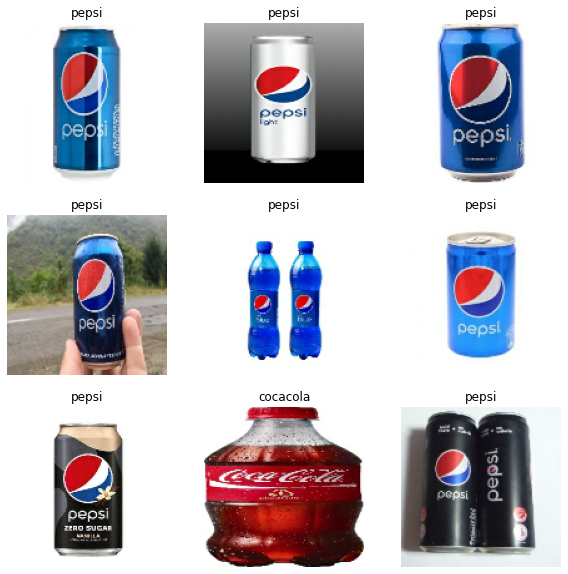

In [5]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

### Preparación de los datos

Todos los valores de las imágenes están entre 0 y 255. Si estamos entrenando una red neuronal, por varias razones es más fácil si transformamos los valores para tratar todos con valores entre 0 y 1. Este proceso se llama **estandarización** y se puede hacer usando `tf.keras.layers.Rescaling` al momento de crear el modelo.

Lo que pocede ahora es trabajar en la preparación de los datos (cache) para posteriormente desarrollar el modelo.

In [6]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Creación de una red neuronal

A continuación aprenderemos a utilizar TensorFlow para crear una red neuronal.

In [34]:
num_classes = len(class_names)

model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [36]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

### Entrenamiento del modelo

Para entrenar el modelo, simplemente utilizamos el método `.fit()` del modelo.

In [56]:
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=5
)

Epoch 1/5
11/11 [==============================] - 0s 6ms/step - loss: 0.1292 - accuracy: 0.9471 - val_loss: 0.3946 - val_accuracy: 0.8500
Epoch 2/5
11/11 [==============================] - 0s 6ms/step - loss: 0.1142 - accuracy: 0.9471 - val_loss: 0.2955 - val_accuracy: 0.8667
Epoch 3/5
11/11 [==============================] - 0s 6ms/step - loss: 0.0436 - accuracy: 0.9941 - val_loss: 0.3560 - val_accuracy: 0.8500
Epoch 4/5
11/11 [==============================] - 0s 6ms/step - loss: 0.0524 - accuracy: 0.9912 - val_loss: 0.3788 - val_accuracy: 0.8500
Epoch 5/5
11/11 [==============================] - 0s 5ms/step - loss: 0.0483 - accuracy: 0.9912 - val_loss: 0.3038 - val_accuracy: 0.8667


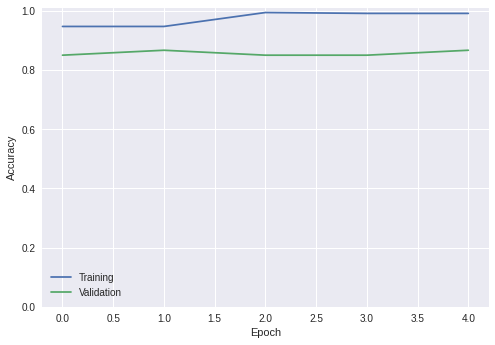

In [62]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.ylim((0,1.01))
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'])
plt.grid('True')
plt.show()

### Evaluación y predicción

In [38]:
model.evaluate(test_ds)

2/2 [==============================] - 0s 7ms/step - loss: 0.2898 - accuracy: 0.8667


[0.2897869646549225, 0.8666666746139526]

Prediction: [[0.0053061]]


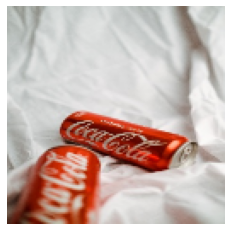

In [44]:
import os

import matplotlib.pyplot as plt
import numpy as np
import cv2


test_path = 'uanl-workshop/data/pepsi-coke/test'
test_path_coke = os.path.join(test_path, 'cocacola')
test_path_pepsi = os.path.join(test_path, 'pepsi')


sample_index = 20
in_img = cv2.imread(os.path.join(test_path_coke, f'{sample_index}.jpg'))
in_img = cv2.cvtColor(in_img, cv2.COLOR_BGR2RGB)
in_img = cv2.resize(in_img, (size, size))

plt.imshow(in_img)
plt.axis('off')
print('Prediction:', model.predict(np.expand_dims(in_img, axis=0)))

<center>
    *********
</center>

## **¡Reto!**

Ahora vamos a crear un clasificador de imágenes utilizando un conjunto de datos sobre perritos y gatitos.

**¡El reto consiste en obtener el accuracy más alto del grupo!**

509/509 [==============================] - 22s 43ms/step - loss: 0.6862 - accuracy: 0.5486 - val_loss: 0.6806 - val_accuracy: 0.5902


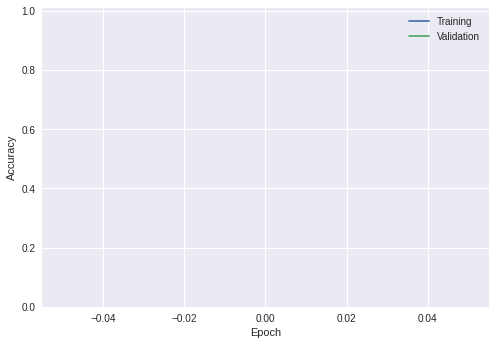

In [78]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
plt.style.use('seaborn')


HEIGHT = 128
WIDTH = 128
class_names = ['cat', 'dog']
split = ['train[:70%]', 'train[70%:]']

def preprocess(img, label):
    return tf.image.resize(img, [HEIGHT, WIDTH]) / 255, label


# Load and prepare data
train_ds, test_ds = tfds.load(name='cats_vs_dogs', split=split, as_supervised=True)
train_ds = train_ds.map(preprocess).batch(32)
test_ds = test_ds.map(preprocess).batch(32)


# Build model
mlp_model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

mlp_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


# Train model
history = mlp_model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=1
)


# Plot training
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.ylim((0,1.01))
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'])
plt.grid('True')
plt.show()

In [79]:
mlp_model.evaluate(test_ds)

219/219 [==============================] - 6s 28ms/step - loss: 0.6806 - accuracy: 0.5902


[0.6806402802467346, 0.5901991724967957]

--------

> Contenido creado por **Rodolfo Ferro**, 2022. <br>
> Puedes contactarme a través de Insta ([@rodo_ferro](https://www.instagram.com/rodo_ferro/)) o Twitter ([@rodo_ferro](https://twitter.com/rodo_ferro)).